In [39]:
# KNN Classification
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataframe = read_csv('Zoo.csv')
dataframe.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
dataframe.shape

(101, 18)

In [14]:
dataframe[['animal name','type']].value_counts()

animal name  type
frog         5       2
pony         1       1
sealion      1       1
seal         1       1
seahorse     4       1
                    ..
gorilla      1       1
goat         1       1
gnat         6       1
girl         1       1
wren         2       1
Length: 100, dtype: int64

In [15]:
dataframe['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [16]:
dataframe['type'] = dataframe['type'].replace({1:'Mammal',2:'Bird',3:'Reptile',4:'Fish',5:'Amphibian',6:'Bug',7:'Invertebrate'})
dataframe

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,Mammal
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,Bug
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mammal
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,Invertebrate


In [17]:
array = dataframe.values
X = array[:, 1:17]
Y = array[:, 17]

In [18]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=object)

In [19]:
Y

array(['Mammal', 'Mammal', 'Fish', 'Mammal', 'Mammal', 'Mammal', 'Mammal',
       'Fish', 'Fish', 'Mammal', 'Mammal', 'Bird', 'Fish', 'Invertebrate',
       'Invertebrate', 'Invertebrate', 'Bird', 'Mammal', 'Fish', 'Mammal',
       'Bird', 'Bird', 'Mammal', 'Bird', 'Bug', 'Amphibian', 'Amphibian',
       'Mammal', 'Mammal', 'Mammal', 'Bug', 'Mammal', 'Mammal', 'Bird',
       'Fish', 'Mammal', 'Mammal', 'Bird', 'Fish', 'Bug', 'Bug', 'Bird',
       'Bug', 'Bird', 'Mammal', 'Mammal', 'Invertebrate', 'Mammal',
       'Mammal', 'Mammal', 'Mammal', 'Bug', 'Amphibian', 'Invertebrate',
       'Mammal', 'Mammal', 'Bird', 'Bird', 'Bird', 'Bird', 'Fish', 'Fish',
       'Reptile', 'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Mammal',
       'Mammal', 'Mammal', 'Mammal', 'Bird', 'Invertebrate', 'Fish',
       'Mammal', 'Mammal', 'Reptile', 'Invertebrate', 'Bird', 'Bird',
       'Reptile', 'Invertebrate', 'Fish', 'Bird', 'Mammal',
       'Invertebrate', 'Fish', 'Bird', 'Bug', 'Amphibian', 'Reptile',
   

### Grid Search for Algorithm Tuning

In [20]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [50]:
n_neighbors = numpy.array(range(1,11))
param_grid = dict(n_neighbors=n_neighbors)

In [51]:
n_neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [52]:
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])}

In [53]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [54]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


### Visualizing the CV results

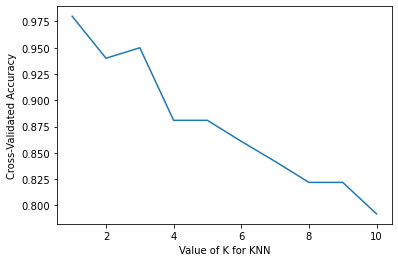

In [58]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 11
k_range = range(1, 11)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [56]:
num_folds = 10
kfold = KFold(n_splits=10)

In [57]:
model = KNeighborsClassifier(n_neighbors=1)
results = cross_val_score(model, X, Y, cv=kfold)
results

array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.9, 1. , 0.9])

In [44]:
print(results.mean())

0.9800000000000001
